| [02_lexical_analysis/01_中文分词.ipynb](https://github.com/shibing624/nlp-tutorial/tree/main/02_lexical_analysis/01_中文分词.ipynb)  | 中文分词工具  |[Open In Colab](https://colab.research.google.com/github/shibing624/nlp-tutorial/blob/main/02_lexical_analysis/01_中文分词.ipynb) |

# Bert Embedding

## 获取Bert模型的Embedding


基于transformers库获取Bert模型的向量数据：

In [23]:
import os

import numpy as np
import torch
from transformers import AutoModel, AutoTokenizer

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
model_dir = os.path.expanduser('~/.pycorrector/datasets/bert_models/chinese_finetuned_lm')
print(model_dir)
tokenizer = AutoTokenizer.from_pretrained(model_dir)
print("token ok")
model = AutoModel.from_pretrained(model_dir)
print("model ok")
# tensor([[ 101, 3217, 4697,  679, 6230, 3236,  102]])
inputs = tokenizer('春眠不觉晓', return_tensors='pt')
outputs = model(**inputs)  # shape (1, 7, 768)
print(outputs)
v = torch.mean(outputs[0], dim=1)  # shape (1, 768)
print(v)
print(v.shape)

/Users/xuming/.pycorrector/datasets/bert_models/chinese_finetuned_lm
token ok


Some weights of the model checkpoint at /Users/xuming/.pycorrector/datasets/bert_models/chinese_finetuned_lm were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model ok
BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0462,  0.5329,  0.1521,  ...,  0.1440, -0.4105,  0.2640],
         [ 0.3368,  0.5288, -0.5288,  ...,  0.0241, -0.0017,  0.6836],
         [ 0.8783, -0.7624, -0.3651,  ..., -0.1129, -0.1835,  0.4492],
         ...,
         [ 1.1596,  0.7187, -0.4550,  ...,  0.4255, -1.0546,  0.4000],
         [ 0.3089,  0.1456, -0.7718,  ..., -0.3547, -1.1788, -0.1022],
         [-0.1397,  0.1891,  0.0370,  ..., -0.4032,  0.1067,  0.8418]]],
       grad_fn=<NativeLayerNormBackward>), pooler_output=tensor([[ 0.9999,  1.0000,  1.0000,  0.9994,  0.9917,  0.9673, -0.9951, -0.9998,
          0.7602, -0.9998,  1.0000,  0.8789, -0.9962, -0.9991,  0.9999, -0.9998,
         -0.9808,  0.9962,  0.9995, -0.8180,  1.0000, -1.0000, -0.7954,  0.9890,
         -0.0880,  0.9994,  0.9973, -0.9975, -1.0000,  0.9999,  0.9937,  0.9998,
          0.7745, -1.0000, -1.0000,  0.9997,  0.7679,  0.9995,  0.9810, -0.8222,
         -0.9881, -0.968

In [24]:
inputs

{'input_ids': tensor([[ 101, 3217, 4697,  679, 6230, 3236,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [25]:
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0462,  0.5329,  0.1521,  ...,  0.1440, -0.4105,  0.2640],
         [ 0.3368,  0.5288, -0.5288,  ...,  0.0241, -0.0017,  0.6836],
         [ 0.8783, -0.7624, -0.3651,  ..., -0.1129, -0.1835,  0.4492],
         ...,
         [ 1.1596,  0.7187, -0.4550,  ...,  0.4255, -1.0546,  0.4000],
         [ 0.3089,  0.1456, -0.7718,  ..., -0.3547, -1.1788, -0.1022],
         [-0.1397,  0.1891,  0.0370,  ..., -0.4032,  0.1067,  0.8418]]],
       grad_fn=<NativeLayerNormBackward>), pooler_output=tensor([[ 0.9999,  1.0000,  1.0000,  0.9994,  0.9917,  0.9673, -0.9951, -0.9998,
          0.7602, -0.9998,  1.0000,  0.8789, -0.9962, -0.9991,  0.9999, -0.9998,
         -0.9808,  0.9962,  0.9995, -0.8180,  1.0000, -1.0000, -0.7954,  0.9890,
         -0.0880,  0.9994,  0.9973, -0.9975, -1.0000,  0.9999,  0.9937,  0.9998,
          0.7745, -1.0000, -1.0000,  0.9997,  0.7679,  0.9995,  0.9810, -0.8222,
         -0.9881, -0.9682,  0.459

In [26]:
outputs[0].shape

torch.Size([1, 7, 768])

last_hidden_state 的 shape (1, 7, 768), 表示：1句话，7个token，分别是1个CLS + 5个汉字 + 1个SEP， 768是embedding size。

- 计算句子间相似度值

In [27]:
def sentence_embedding(sentence):
    input_ids = tokenizer(sentence, return_tensors='pt')
    o = model(**input_ids)
    return torch.mean(o[0], dim=1)


sentences = ['春眠不觉晓', '大梦谁先觉', '浓睡不消残酒', '东临碣石以观沧海']

with torch.no_grad():
    vs = [sentence_embedding(sentence).numpy() for sentence in sentences]
    nvs = [v / np.linalg.norm(v) for v in vs]  # normalize each vector
    m = np.array(nvs).squeeze(1)  # shape (4, 768)
    print(np.around(m @ m.T, decimals=2))  # pairwise cosine similarity

[[1.   0.78 0.79 0.6 ]
 [0.78 1.   0.75 0.58]
 [0.79 0.75 1.   0.61]
 [0.6  0.58 0.61 1.  ]]


# 获取SentenceBert的句子向量表示

In [28]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on to the street is not it"  # this is very similar to 'g'
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted rotten"
e = "joyce enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yellow fruit"  # this is very similar to 'b'

Installing dependencies needed for this notebook

In [29]:
!pip install -qU transformers sentence-transformers

In [30]:
from transformers import AutoTokenizer, AutoModel
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Initialize our HF transformer model and tokenizer - using a pretrained SBERT model.

In [31]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

Tokenize all of our sentences.

In [32]:
tokens = tokenizer([a, b, c, d, e, f, g],
                   max_length=128,
                   truncation=True,
                   padding='max_length',
                   return_tensors='pt')

In [33]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [34]:
tokens['input_ids'][0]

tensor([ 101, 6379, 2003, 1996, 2190, 2103, 1999, 1996, 3224,  102,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

In [35]:
tokens['input_ids'][0].shape

torch.Size([128])

Process our tokenized tensors through the model.

In [36]:
outputs = model(**tokens)
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

Here we can see the final embedding layer, *last_hidden_state*.

In [37]:
embeddings = outputs.last_hidden_state
embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.1894, -0.3711,  0.3034,  ...,  0.1536,  0.3265,  0.1376],
        [-0.2496, -0.5227,  0.2341,  ...,  0.3419,  0.3164,  0.0256],
        [-0.3311, -0.4430,  0.3492,  ...,  0.3655,  0.2910,  0.0728]],
       grad_fn=<SelectBackward>)

In [38]:
embeddings[0].shape

torch.Size([128, 768])

Here we have our vectors of length *768*, but we see that these are not *sentence vectors* because we have a vector representation for each token in our sequence (128 in total). We need to perform a mean pooling operation to create the sentence vector.

The first thing we do is multiply each value in our `embeddings` tensor by its respective `attention_mask` value. The `attention_mask` contains **1s** where we have 'real tokens' (eg not padding tokens), and 0s elsewhere - so this operation allows us to ignore non-real tokens.

In [39]:
mask = tokens['attention_mask'].unsqueeze(-1).expand(embeddings.size()).float()
mask.shape

torch.Size([7, 128, 768])

In [40]:
mask[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Now we have a masking array that has an equal shape to our output `embeddings` - we multiply those together to apply the masking operation on our outputs.

In [41]:
masked_embeddings = embeddings * mask
masked_embeddings[0]

tensor([[-0.6239, -0.2058,  0.0411,  ...,  0.1490,  0.5681,  0.2381],
        [-0.3694, -0.1485,  0.3780,  ...,  0.4204,  0.5553,  0.1441],
        [-0.7221, -0.3813,  0.2031,  ...,  0.0761,  0.5162,  0.2813],
        ...,
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
       grad_fn=<SelectBackward>)

Sum the remaining embeddings along axis 1 to get a total value in each of our 768 values.

In [42]:
summed = torch.sum(masked_embeddings, 1)
summed.shape

torch.Size([7, 768])

Next, we count the number of values that should be given attention in each position of the tensor (+1 for real tokens, +0 for non-real).

In [43]:
counted = torch.clamp(mask.sum(1), min=1e-9)
counted.shape

torch.Size([7, 768])

Finally, we get our mean-pooled values as the `summed` embeddings divided by the number of values that should be given attention, `counted`.

In [44]:
mean_pooled = summed / counted
mean_pooled.shape

torch.Size([7, 768])

Now we have our sentence vectors, we can calculate the cosine similarity between each.

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [46]:
# convert to numpy array from torch tensor
mean_pooled = mean_pooled.detach().numpy()

# calculate similarities (will store in array)
scores = np.zeros((mean_pooled.shape[0], mean_pooled.shape[0]))
for i in range(mean_pooled.shape[0]):
    scores[i, :] = cosine_similarity(
        [mean_pooled[i]],
        mean_pooled
    )[0]

In [47]:
scores

array([[ 1.00000024,  0.18692753,  0.28297687,  0.29628235,  0.27451012,
         0.1017626 ,  0.21696253],
       [ 0.18692753,  1.        ,  0.72058773,  0.5142895 ,  0.11749641,
         0.1930692 ,  0.66182351],
       [ 0.28297687,  0.72058773,  1.00000012,  0.48864433,  0.2356894 ,
         0.17157128,  0.5599308 ],
       [ 0.29628235,  0.5142895 ,  0.48864433,  0.99999976,  0.26985487,
         0.3788943 ,  0.52388817],
       [ 0.27451012,  0.11749642,  0.23568939,  0.2698549 ,  0.99999994,
         0.23422128, -0.01599788],
       [ 0.10176259,  0.1930692 ,  0.17157127,  0.37889427,  0.23422126,
         1.00000012,  0.22319673],
       [ 0.21696255,  0.66182345,  0.5599308 ,  0.52388811, -0.01599788,
         0.22319674,  0.99999994]])

We can visualize these scores using `matplotlib`.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

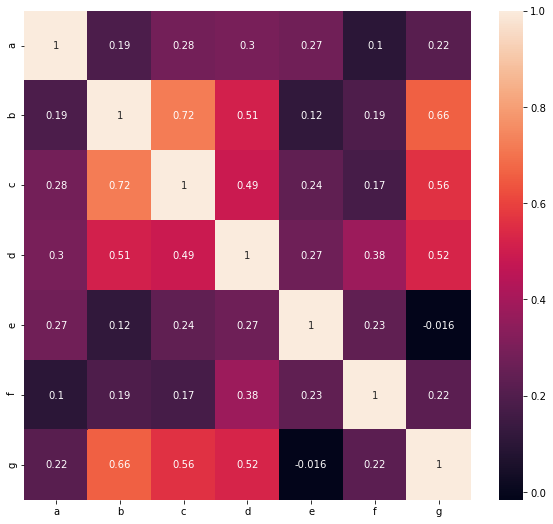

In [49]:
plt.figure(figsize=(10,9))
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)


---

Use transformer Hub usage:

In [50]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = [a, b, c, d, e, f, g]
# Load model from HuggingFace Hub
# tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-large-nli-stsb-mean-tokens')
# model = AutoModel.from_pretrained('sentence-transformers/bert-large-nli-stsb-mean-tokens')


tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/bert-base-nli-mean-tokens')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Sentence embeddings:
tensor([[-0.6474, -0.2272,  0.2818,  ...,  0.1978,  0.4435,  0.0792],
        [ 0.6863, -0.0601, -0.2189,  ...,  0.7335, -0.5784,  0.1052],
        [ 0.3188, -0.5652, -0.1400,  ...,  1.3114, -0.2103, -0.6065],
        ...,
        [-0.8977,  0.5363, -0.4212,  ...,  0.1217,  0.6893, -0.0699],
        [-0.2906,  0.6061,  0.7286,  ..., -0.2979,  0.0418,  0.0344],
        [ 0.4173,  0.5862,  0.6657,  ...,  0.4557, -1.4096, -0.0327]])


In [51]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# calculate similarities (will store in array)
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
scores

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [52]:
sentence_embeddings

tensor([[-0.6474, -0.2272,  0.2818,  ...,  0.1978,  0.4435,  0.0792],
        [ 0.6863, -0.0601, -0.2189,  ...,  0.7335, -0.5784,  0.1052],
        [ 0.3188, -0.5652, -0.1400,  ...,  1.3114, -0.2103, -0.6065],
        ...,
        [-0.8977,  0.5363, -0.4212,  ...,  0.1217,  0.6893, -0.0699],
        [-0.2906,  0.6061,  0.7286,  ..., -0.2979,  0.0418,  0.0344],
        [ 0.4173,  0.5862,  0.6657,  ...,  0.4557, -1.4096, -0.0327]])

In [53]:
sentence_embeddings = sentence_embeddings.numpy()
for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity(
        [sentence_embeddings[i]],
        sentence_embeddings
    )[0]

In [54]:
scores

array([[ 1.00000024,  0.18692753,  0.28297687,  0.29628235,  0.27451012,
         0.1017626 ,  0.21696253],
       [ 0.18692753,  1.        ,  0.72058773,  0.5142895 ,  0.11749641,
         0.1930692 ,  0.66182351],
       [ 0.28297687,  0.72058773,  1.00000012,  0.48864433,  0.2356894 ,
         0.17157128,  0.5599308 ],
       [ 0.29628235,  0.5142895 ,  0.48864433,  0.99999976,  0.26985487,
         0.3788943 ,  0.52388817],
       [ 0.27451012,  0.11749642,  0.23568939,  0.2698549 ,  0.99999994,
         0.23422128, -0.01599788],
       [ 0.10176259,  0.1930692 ,  0.17157127,  0.37889427,  0.23422126,
         1.00000012,  0.22319673],
       [ 0.21696255,  0.66182345,  0.5599308 ,  0.52388811, -0.01599788,
         0.22319674,  0.99999994]])

<AxesSubplot:>

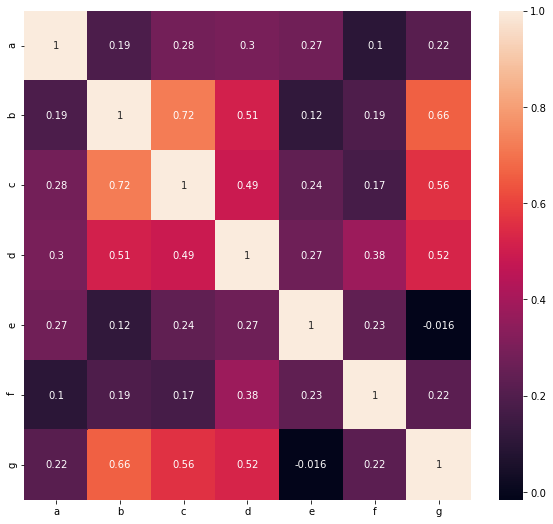

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)


---

## Using sentence-transformers

The `sentence-transformers` library allows us to compress all of the above into just a few lines of code.

In [56]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

We encode the sentences (producing our mean-pooled sentence embeddings) like so:

In [57]:
sentence_embeddings = model.encode([a, b, c, d, e, f, g])

In [58]:
sentence_embeddings.shape

(7, 768)

And calculate the cosine similarity just like before.

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# calculate similarities (will store in array)
scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity(
        [sentence_embeddings[i]],
        sentence_embeddings
    )[0]

In [61]:
scores

array([[ 1.00000024,  0.18692753,  0.28297687,  0.29628235,  0.27451012,
         0.1017626 ,  0.21696253],
       [ 0.18692753,  1.        ,  0.72058773,  0.5142895 ,  0.11749641,
         0.1930692 ,  0.66182351],
       [ 0.28297687,  0.72058773,  1.00000012,  0.48864433,  0.2356894 ,
         0.17157128,  0.5599308 ],
       [ 0.29628235,  0.5142895 ,  0.48864433,  0.99999976,  0.26985487,
         0.3788943 ,  0.52388817],
       [ 0.27451012,  0.11749642,  0.23568939,  0.2698549 ,  0.99999994,
         0.23422128, -0.01599788],
       [ 0.10176259,  0.1930692 ,  0.17157127,  0.37889427,  0.23422126,
         1.00000012,  0.22319673],
       [ 0.21696255,  0.66182345,  0.5599308 ,  0.52388811, -0.01599788,
         0.22319674,  0.99999994]])

<AxesSubplot:>

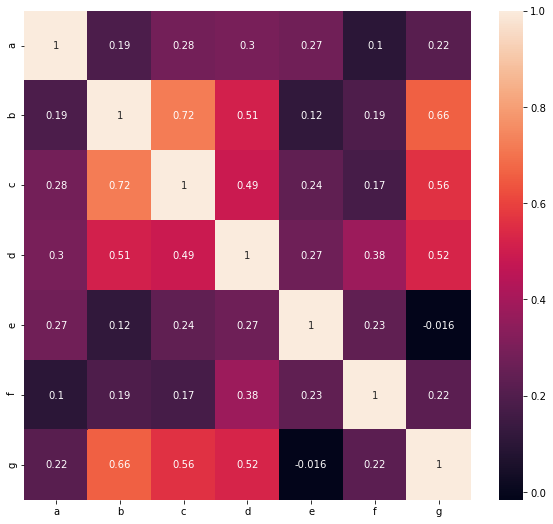

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,9))
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)

本节完。